<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/simeseNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try: 
  %tensorflow_version 2.x
except Exception:
    pass 


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [6]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
            
    return np.array(pairs), np.array(labels)


def create_pairs_on_set(images, labels):
    
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')
    
    return pairs, y


def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [7]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
print(test_images.dtype)

uint8


In [9]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0


In [11]:
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

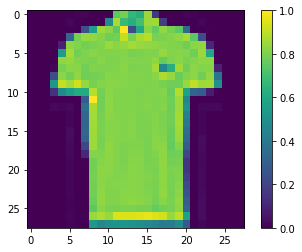

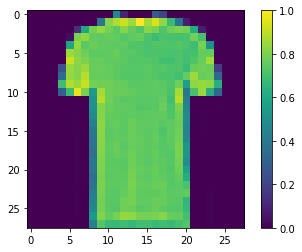

In [12]:
pair_off = 10
show_image(ts_pairs[pair_off][0])
show_image(ts_pairs[pair_off][1])

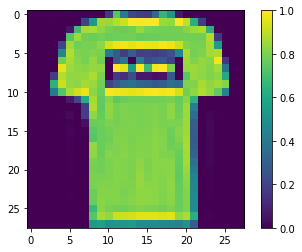

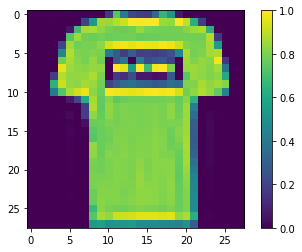

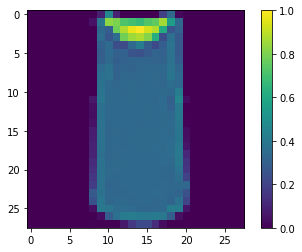

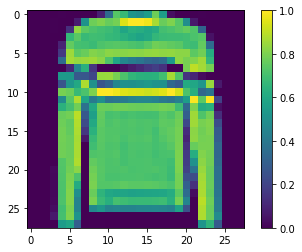

In [13]:
show_image(tr_pairs[:,0][0])
show_image(tr_pairs[:,0][1])

show_image(tr_pairs[:,1][0])
show_image(tr_pairs[:,1][1])

In [16]:
def base_net():
  input = Input(shape=(28,28,),name='base_input')
  x = Flatten(name='flatten_input')(input)
  x = Dense(128,activation='relu', name ='first_base_dense')(x)
  x = Dropout(0.1,name='first_dropout')(x)
  x = Dense(128,activation='relu', name ='second_base_dense')(x)
  x = Dropout(0.1, name = 'second_dropout')(x)
  x = Dense(128,activation='relu', name='third_base_dense')(x)

  return Model(inputs = input, outputs = x)

In [ ]:
def ecu_distance (vects):
  x,y = vects
  sum_square = K.sum()